In [333]:
import numpy as np
import random
import skimage.data as da
import matplotlib.pyplot as plt
import cv2
import skimage.io as io
import os

In [356]:
# All images from absalon
path = "data"
images = [io.imread(os.path.join(path,filename)) for filename in os.listdir(path)]

In [360]:
images[1].shape
from skimage.color import rgb2gray

In [364]:
grayscale = cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY)

In [366]:
grayscale.shape

(800, 800)

In [339]:
# inspiration taken from here: https://datasciencelab.wordpress.com/tag/lloyds-algorithm/
def lloyd(img, k):
    
    # the idea here is to create a dict in which the keys are both cluster centroids
    # and the respective values are the indices of the picture
    cluster = {}
    
    # first, let's initialize a list of random centroids
    old_cent = []
    new_cent = random.sample(list(img[0]), k)
    
    # initialize keys in cluster dict
    for k in new_cent:
        cluster[k] = []

    # as long as old centroids and new centroids aren't the same:
    while not np.array_equal(old_cent, new_cent):
    #for i in range(0,3):
        old_cent = new_cent
        # assign points to the new centroid
        cluster = assign_cent(old_cent, img)
        # compute new centroids according to the cluster
        new_cent = make_new_center(cluster)

    # now we have all clustered values in a dict and just have to
    # convert this into a picture
    segmented = np.zeros(img.shape)
    
    for k in cluster.keys():
        for i in cluster[k]:
            segmented[i[0:2]] = k
    
    # it doesn't return a modified image yet
    return segmented

# with cents == list of all centroids and 
# img == image to be centroided
def assign_cent(cents, img):
    
    new_cluster = {}
    near_cent = 0
        
    # iter over every point in the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # find the nearest center for this point by iterating
            # through the cenroids and calculating their distance to centroid
            min_dist = len(img)**2
            for cent in cents:
                temp = (int(cent) - int(img[i][j]))**2
               # print(f"index:{i,j}, error:{temp}, centroid n:{cent}")
               # print(f"temp: {temp}, min distance: {min_dist}")
                if temp < min_dist:
                    min_dist = temp
                   # print(f"nearest:{near_cent}")
                    # nearest centroid is always the same WHY?
                    near_cent = cent
            # add this point according new key in the cluster dict
            if near_cent in new_cluster:
                new_cluster[near_cent].append((i, j, img[i][j]))
            else:
                new_cluster[near_cent] = [(i, j, img[i][j])]
    return new_cluster
    
def make_new_center(data_cluster):
    new_cents = []
    keys = sorted(data_cluster.keys())
    # get mean for every key in the cluster
    # [print(data_cluster[k][2]) for k in keys]
    for k in keys: 
        vals = [lis[2] for lis in data_cluster[k]]
        new_cents.append(np.mean(vals))
    return new_cents

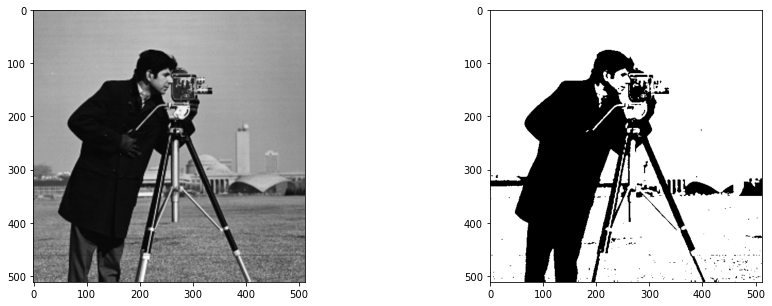

In [337]:
lloyd_img = lloyd(images[2], 2)
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].imshow(images[2], cmap = 'gray')
ax[1].imshow(lloyd_img, cmap = 'gray')
plt.show()

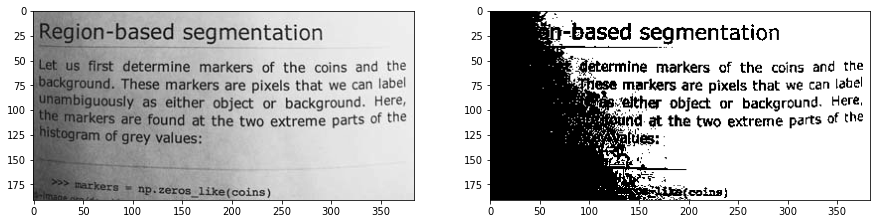

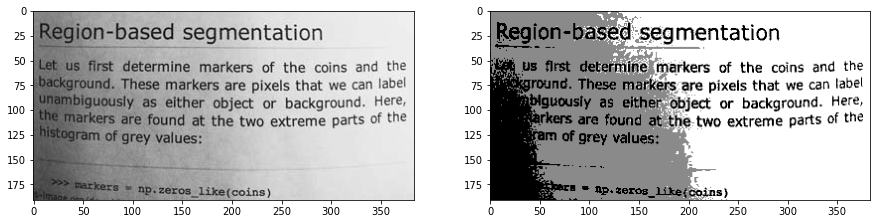

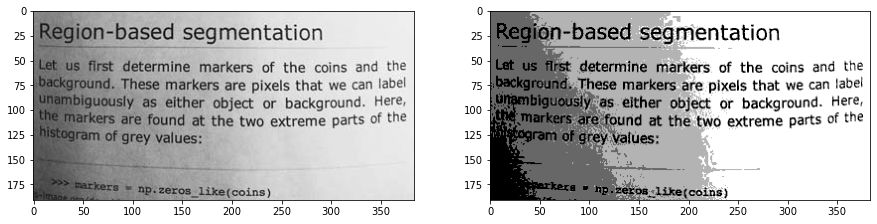

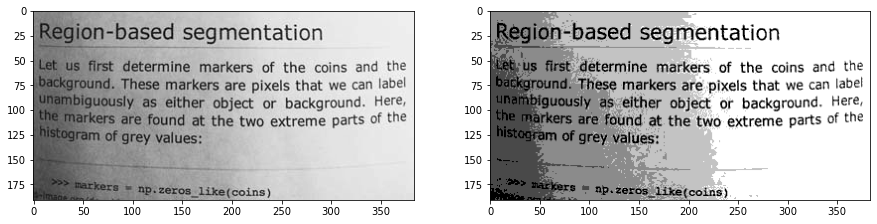

In [348]:
for k in range(2, 6):
    lloyd_img = lloyd(images[1], k)
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    ax[0].imshow(images[1], cmap = 'gray')
    ax[1].imshow(lloyd_img, cmap = 'gray')
    plt.show()